In [0]:
# Inicio do Notebook com o Projeto da cadeira de XXXXX para o aluno Daniel Sampaio Fernandes

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
# Criando Link para arquivo .csv no meu Google Drive com o dataset

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
# Importando Dataset sobre vendas de cartuchos de video games no mundo
# Codigo de Acesso solicitado ->         4/uQHe9r69JSny5Tok3zrmSmk_KO8SUjoiloXuklIKFbOC7cr36qiy_-w
# Visualizando tabela e tamanho do arquivo 
videogame = pd.read_csv('/content/drive/My Drive/vgsales.csv')
videogame.head() , videogame.shape

(   Rank                      Name Platform  ...  JP_Sales Other_Sales Global_Sales
 0     1                Wii Sports      Wii  ...      3.77        8.46        82.74
 1     2         Super Mario Bros.      NES  ...      6.81        0.77        40.24
 2     3            Mario Kart Wii      Wii  ...      3.79        3.31        35.82
 3     4         Wii Sports Resort      Wii  ...      3.28        2.96        33.00
 4     5  Pokemon Red/Pokemon Blue       GB  ...     10.22        1.00        31.37
 
 [5 rows x 11 columns], (16598, 11))

In [119]:
# Calculando a Media das vendas Globais
videogame['Global_Sales'].mean

<bound method Series.mean of 0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64>

In [122]:
# Visualizando as vendas do Console Wii em todas as regiões e de todos os jogos

videogame[(videogame['Platform'] == 'Wii') ]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,TIPO
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Console
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Console
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Console
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Console
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Console
...,...,...,...,...,...,...,...,...,...,...,...,...
16517,16520,Teenage Mutant Ninja Turtles,Wii,2007.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,Console
16552,16555,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007.0,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01,Console
16573,16576,Mini Desktop Racing,Wii,2007.0,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01,Console
16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01,Console


In [108]:
# Verificando Total de Consoles Disponiveis (Total de 31), Console com mais jogos (Nitendo DS)
videogame['Platform'].describe()

count     16598
unique       31
top          DS
freq       2163
Name: Platform, dtype: object

In [109]:
# Visualizando estrutura da tabela

videogame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [110]:
# Criando coluna para identificar se o jogo é de Arcade ou Console e atribuindo o valor "Console" para todos jogos.

videogame['TIPO'] = 'Console'
videogame.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,TIPO
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Console
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Console
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Console
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Console
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Console


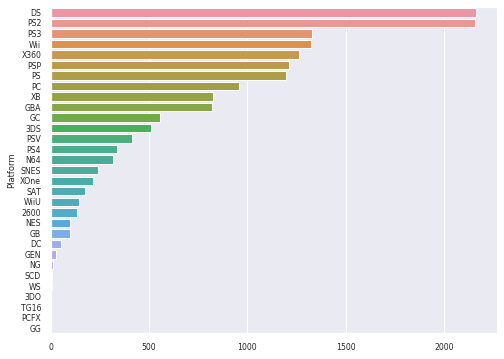

In [111]:
# Analisando quantidade de jogos por tipo de console

platGenre = pd.crosstab(videogame.Platform,videogame.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.ylabel = "Tipo do Console"
plt.xlabel = "Quantidade de Jogos"
plt.show()

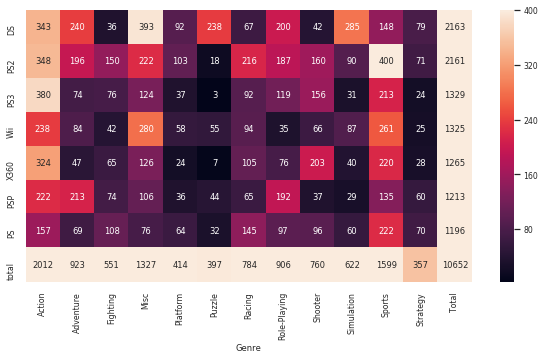

In [112]:
# Plotando Quantidade de Titulos por Console X Tipo de Jogo ("Genero")

platGenre['Total'] = platGenre.sum(axis=1)
popPlatform = platGenre[platGenre['Total']>1000].sort_values(by='Total', ascending = False)
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)
sns.set(font_scale=0.7)
plt.figure(figsize=(10,5))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d")
plt.xticks(rotation = 90)
plt.show()

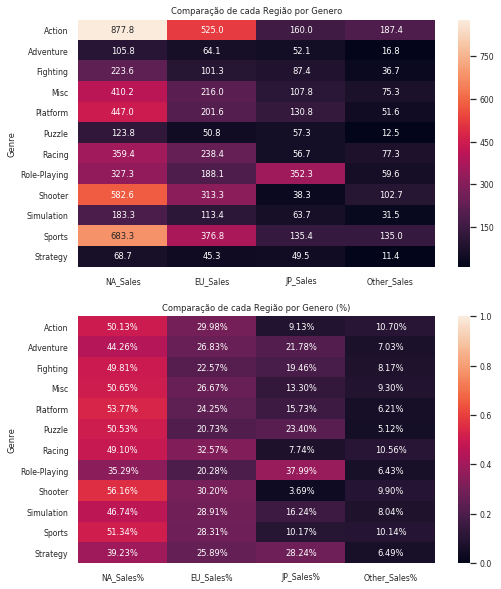

In [113]:
GenreGroup = videogame.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
plt.figure(figsize=(8, 10))
sns.set(font_scale=0.7)
plt.subplot(211)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparação de cada Região por Genero")
plt.subplot(212)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparação de cada Região por Genero (%)")
plt.show()